# Analysis and prediction of Hotel Reservation cancellation.

Group Members:
- Loise Osoro
- Omar Mustaf
- William Ndoni
- Mulei Mutuku
- Paul Muriithi
- Derrick Wekesa

### Introduction
Hotels are a major part of the hospitality industry, that are considered to have a large economic impact to our community. Hotels provide accomodation, entertainment and leisure,both to local and international tourists. Due to their large target population(local and international), hotel reservation system has became a necessary component inorder to expand their customer base.

Hotel reservations systems are a convenient and easy way for customers to access hotel services.
Hotel customers also have the ability to cancel their hotel reservations in advance and receive a full refund or encounter some charges depending on the situation.This is a very convenient feature of hotel reservations to the customers.

### Business Understanding

Hotel business is a very profitable business in the current era.However any hotel can encounter great losses when there is an increase in the churn rate (cancellation of hotel reservations).This is because hotels require constant maintenance whose cost can only be accounted for when the hotel business is running.

The aim of this project is to develop a model that can predict whether a customer will cancel their hotel reservation or not based on certain features.With this model,hotels can be able to anticipate and counter any predestined hotel reservation cancellations.
In addition the model will provide insight on the features that influence the churn rate in the hotel business.This will enable hotel managers to mitigate the churn rate in the hotel business  

### Problem Statement

Being part of the hotel management, the company is been experiencing a dropping hotel revenue collection, which can be linked to the decreasing number of reservation bookings and increased reservation churning / cancelations. Therefore to mitigate this, we have been tasked with to come up with strategies, solutions and recommendations that will be aimed at increased revenue collection in the hotel by, increasing the hotel bookings and reducing the rate of reservation cancelling.

To accomplish this, we will undertake data analysis on the companies reservation data in order to find patterns that can improve revenue collection and hotel bookings as well as developing a model that can predict hotel churning inorder to effectively solve them before their occurence.

### research questions

 * Is the reservation churn rate the same in the various hotel categories?
 * Which are the busiest months in hotel bookings and which months receive the most cancellations?
 * Which reservation channel (e.g., online travel agencies, direct booking, etc.) leads to the most bookings, and which channel is associated  with the highest reservation cancellations?
 * Which countries contribute to the most bookings, and which countries are associated with the highest reservation cancellations?
 * Which hotel features/services need improvement?Can these improvements lead to a significant reduction in the churn rate?
 * What are the key factors that influence hotel reservation cancellations?
 * can we develop a predictive model to anticipate and mitigate reservation cancellations in the hotel business

### Main Objective
This project is aimed at providing appropriate recommendations / strategies that will increasing hotel revenue and to develop a model that can predict hotel churning / cancelation and its major causes and how to mitigate them.

### Specific Objectives

To analyze the reservation churn rate in different hotel categories  and identify if there are significant differences among them.

To determine the busiest months for hotel bookings and identify the months that experience the highest number of reservation cancellations.

To investigate the impact of different reservation channels (e.g., online travel agencies, direct booking) on the number of bookings and cancellations.

To identify the countries that contribute the most to hotel bookings and those associated with the highest reservation cancellations.

To assess and identify the key hotel features/services that may need improvement to reduce reservation cancellations and enhance customer satisfaction.

To understand the key factors that influence hotel reservation cancellations, taking into account various customer-related, booking-related, and hotel-related features.

To develop a predictive model using machine learning algorithms that can anticipate reservation cancellations with a high level of accuracy (80% and above).
### Metrics of Success

- To provide insights on the factors that influence the churn rate in the hotel business. 
- The final model should have an accuracy score of 80% and above.


## Data Understanding
***
The datset contains information collected from two hotel categories; resort and city hotel with a structure of 31 variables and 119,390 observations, with a ratio of 34% to 66% respectively for the two hotels. Each row represents booking done within the period 1st July,2015 and 31st August,2017 and the bookings that were checked-in and the ones canceled.

The dataset was extracted from hotels’ Property Management System (PMS) SQL databases from different hotel categories ,resort and city,in Portugal. Dataset download [link](https://bit.ly/2WvQbhJ)

The information contained in this dataset will be used to train out model.The columns (features) will provide great insight once used to train the model.

In [2]:
# importing necesary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.metrics import roc_curve ,auc, accuracy_score ,precision_score , recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#plottings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')


In [7]:
# Reading the Dataset and looking at the statistics

hotel = pd.read_csv('data/hotel_bookings.csv')
print(f"Rows: {hotel.shape[0]}\n Columns: {hotel.shape[1]}")
hotel.head()

Rows: 119390
 Columns: 32


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
# checking structure of the dataset
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Dropping irrelevant columns 

From the above output, and column descriptions the `company` and `agent`columns represent Identification Numbers  and therefore they are not useful in our data analysis therefore we drop them.
Also the `reservation_status_date` column is a date column and is not necessary to our analysis, we also drop it from our dataset.
We will therefore drop these column to help reduce the model complexity.

In [9]:
# dropping the irrelevant columns
hotel.drop(columns=['company','agent','reservation_status','reservation_status_date'], \
           axis=1, inplace=True)

In [10]:
# summary statistics of columns
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


## Data Preparation
In this section, we will perform data cleaning to prepare the dataset for analysis, the various data cleaning methods that are to be used will be;
- Checking and removing duplicates 
- Dealing with missing data 
- Checking if columns are of required data type 

#### Dealing with missing values and duplicates

In [11]:
# checking for duplicates
print(f"Duplicated: {hotel.duplicated().sum()}")

# droping duplicates
hotel.drop_duplicates(inplace=True)
hotel.shape

Duplicated: 32280


(87110, 28)

In [12]:
# checking for missing values
hotel.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           451
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [13]:
# since children has 4 missing values we impute the median since it is least affected by outliers
hotel.children.fillna(value= hotel.children.median(), inplace=True )

In [14]:
# country fill missing with "missing" value
hotel.country.fillna(value= 'missing', inplace=True )

In [15]:
# confirming our changes
hotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Explolatory Data Analysis

In order to develop a model from the dataset,it is necessary to explore the dataset exhaustively to gain a better understanding.This includes checking the column types and checking for the distribution of the numerical columns to identify outliers

In [16]:
## Checking the column types
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87110 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87110 non-null  object 
 1   is_canceled                     87110 non-null  int64  
 2   lead_time                       87110 non-null  int64  
 3   arrival_date_year               87110 non-null  int64  
 4   arrival_date_month              87110 non-null  object 
 5   arrival_date_week_number        87110 non-null  int64  
 6   arrival_date_day_of_month       87110 non-null  int64  
 7   stays_in_weekend_nights         87110 non-null  int64  
 8   stays_in_week_nights            87110 non-null  int64  
 9   adults                          87110 non-null  int64  
 10  children                        87110 non-null  float64
 11  babies                          87110 non-null  int64  
 12  meal                           

### The number of children should be a whole number

In [17]:
### Changing the children column to an int data type
hotel['children']= hotel.children.astype(int)

In [18]:
## checking the data type of the children column
hotel.children.dtype

dtype('int32')

Next we will explore the distribution of the numerical columns in the datatset.This will help identify whether the data contains outliers to enable us to determine whether normalization should be done on the dataset or the outlier should be removed due to its abnormality.

In [19]:
## creating a dataframe with only numerical columns
hotel_num = hotel.select_dtypes('number')

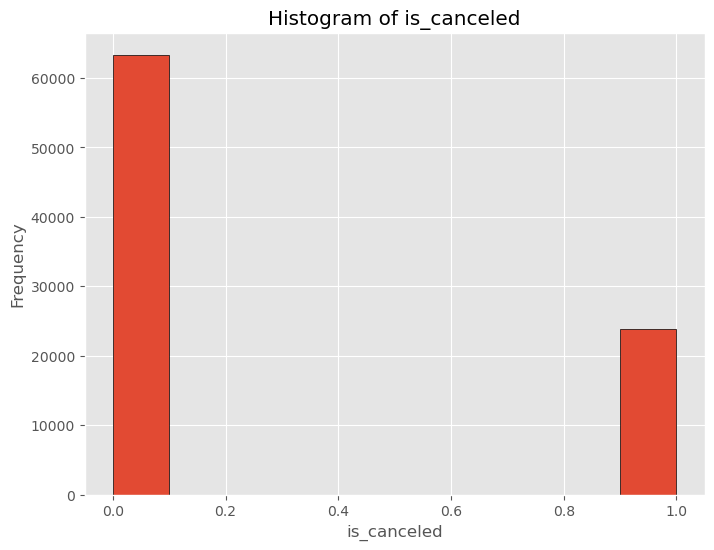

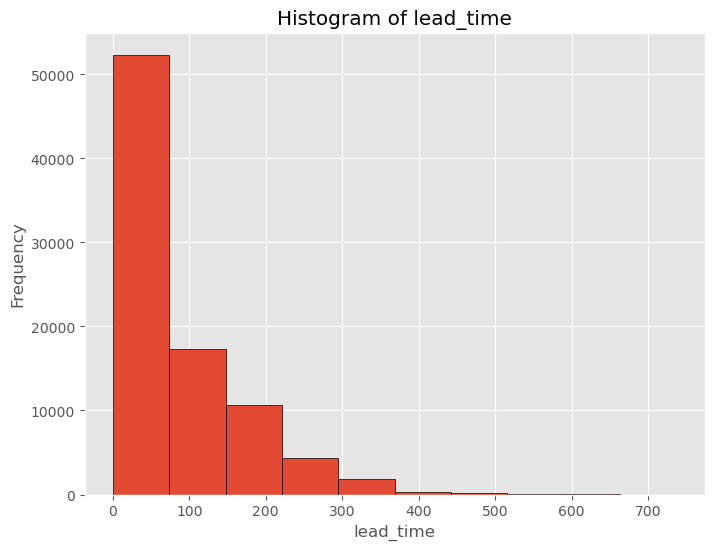

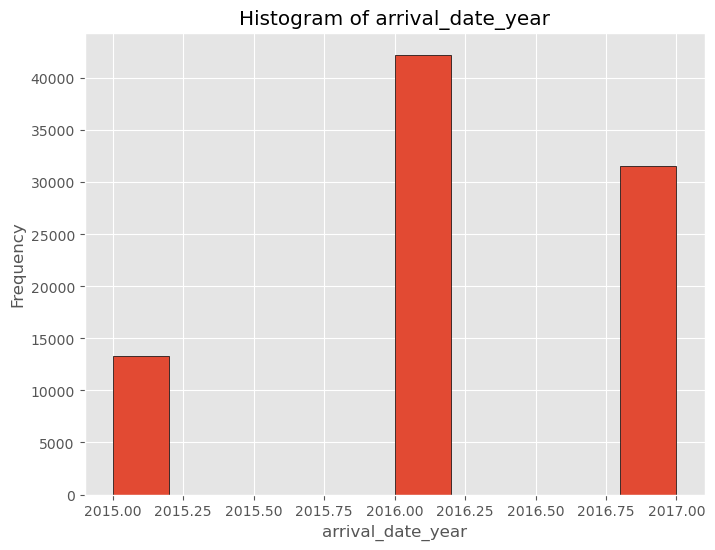

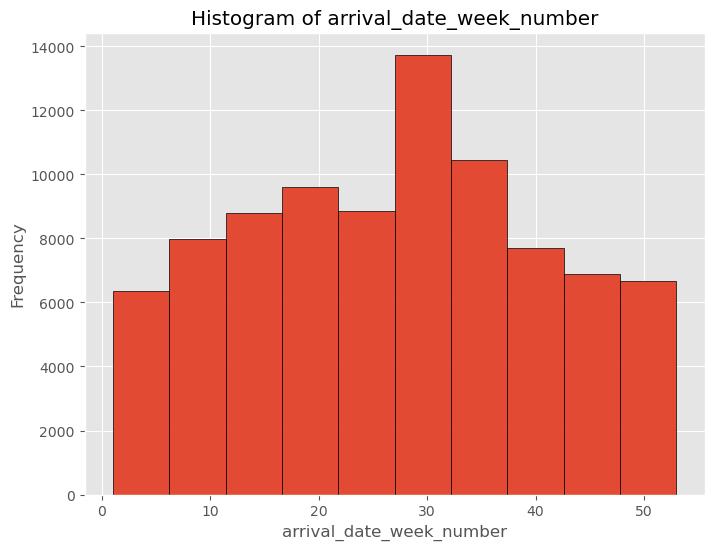

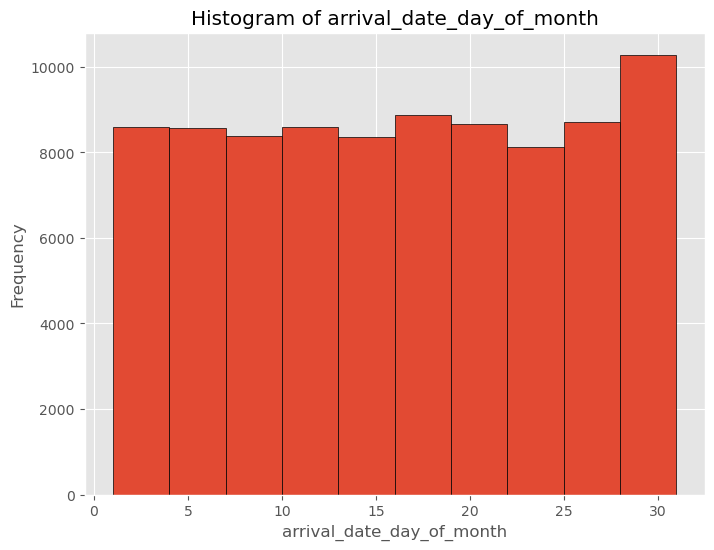

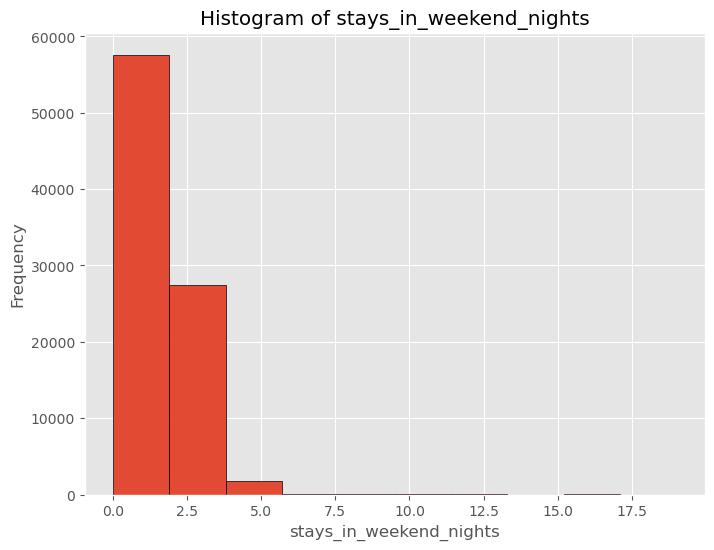

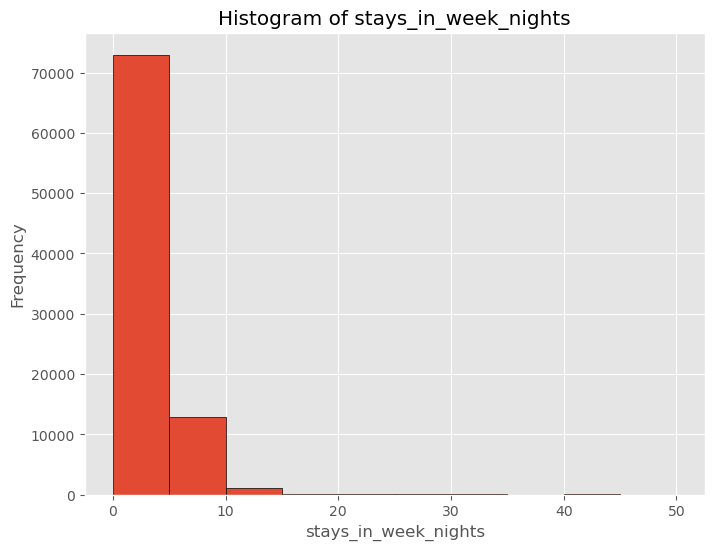

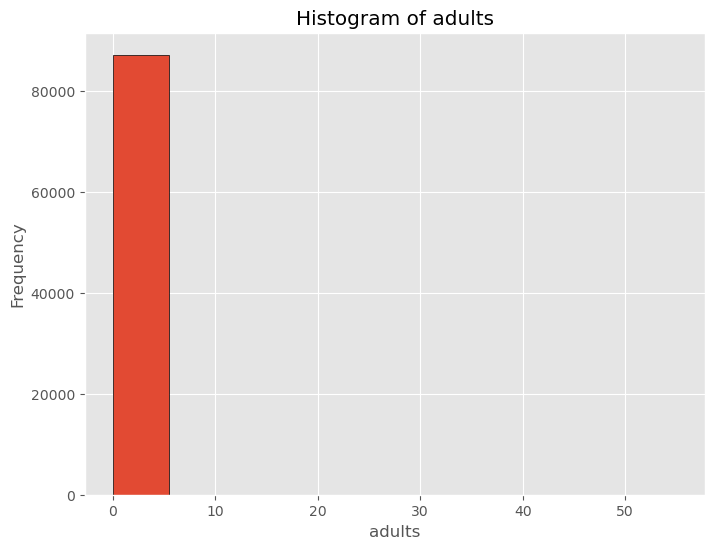

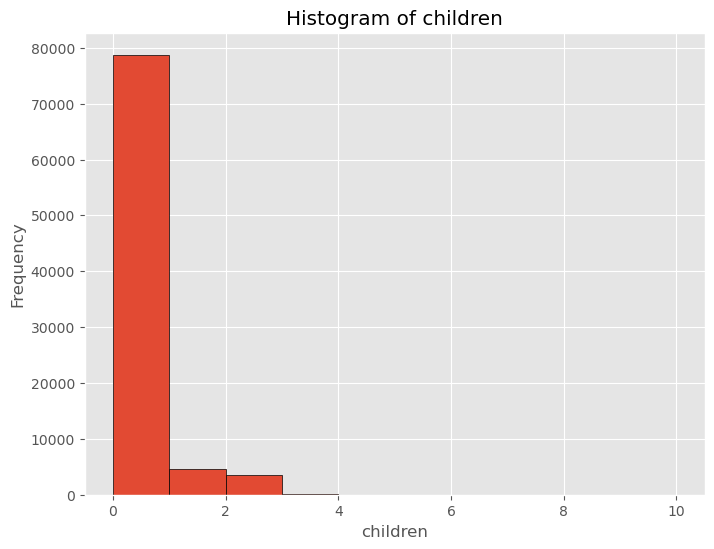

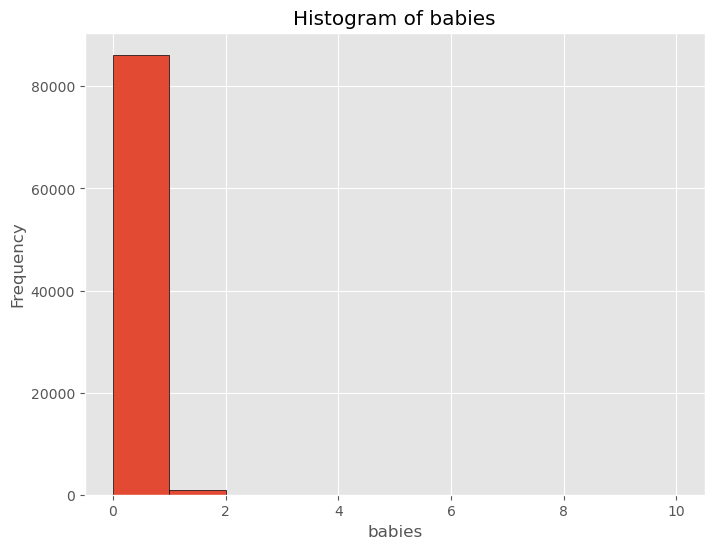

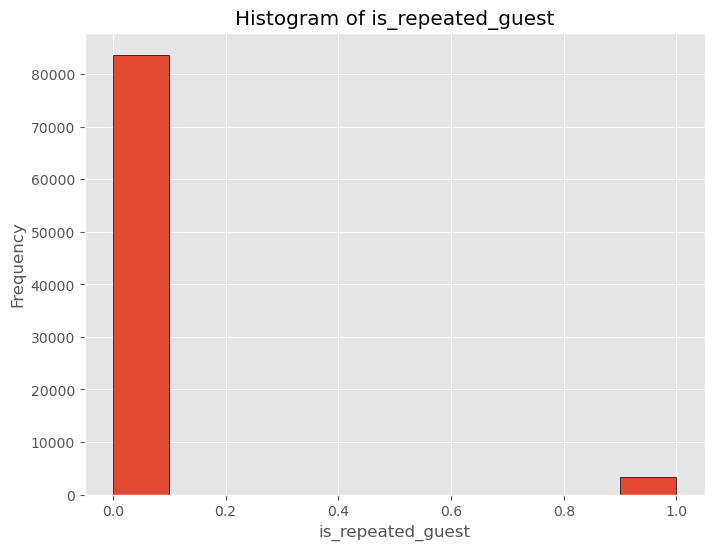

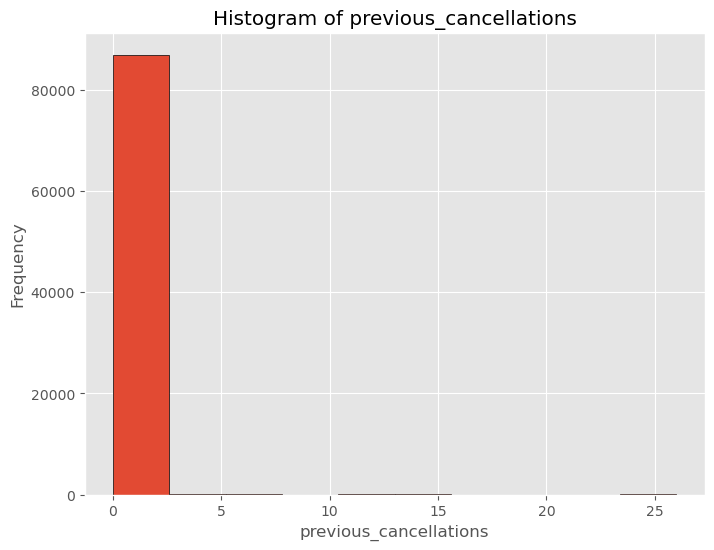

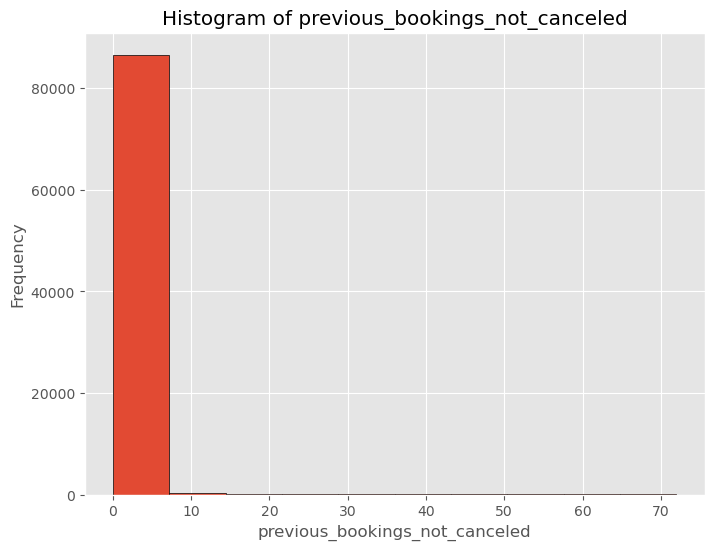

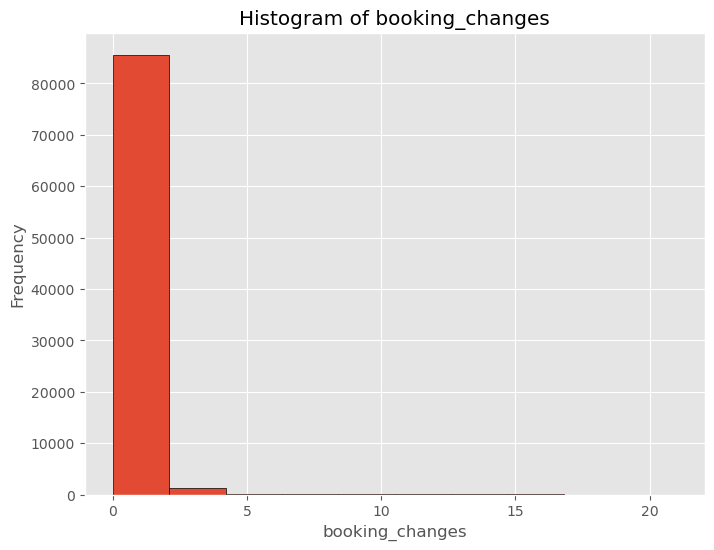

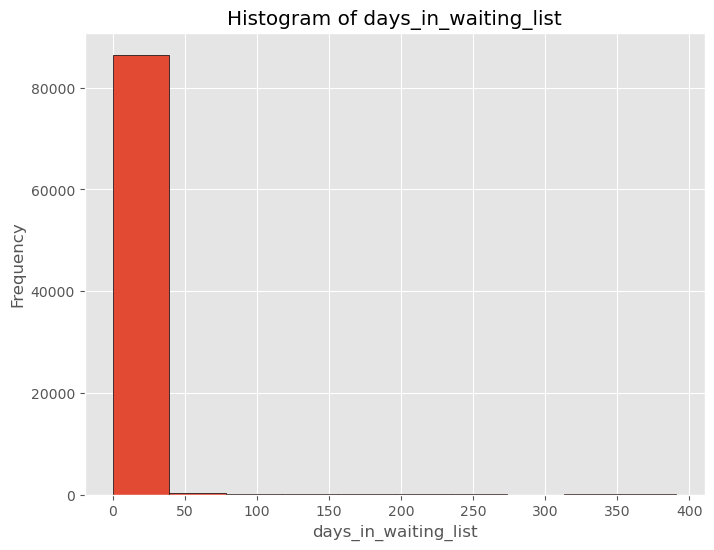

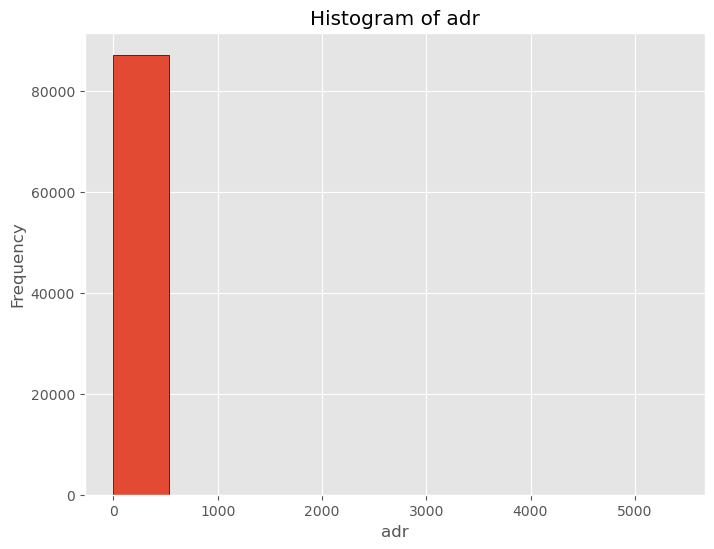

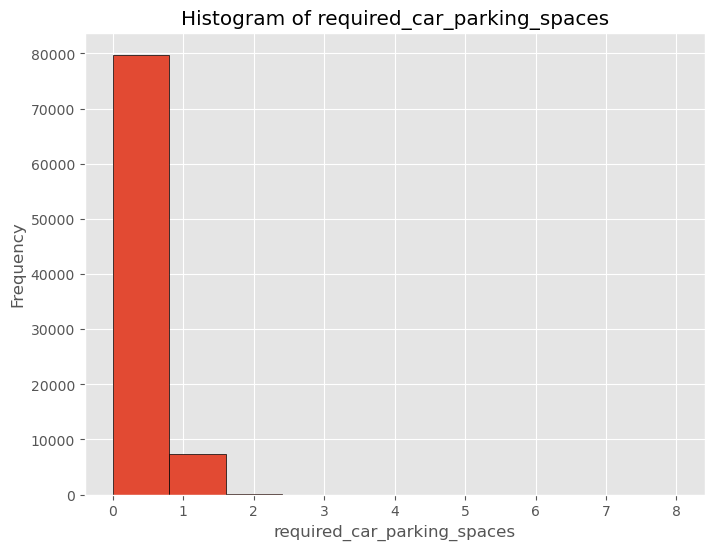

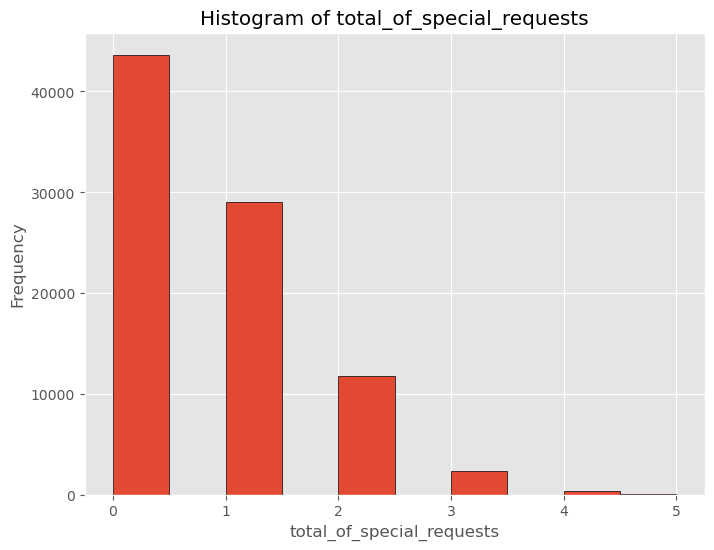

In [20]:
for column in hotel_num.columns:
    plt.figure(figsize=(8, 6))  
    
    # Creating the histogram
    plt.hist(hotel_num[column], bins=10, edgecolor='k') 
    
    # Adding labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


### Creating dummy variables with one hot encoding

In [21]:
### Creating dummy variables
hotel_with_dummies = pd.get_dummies(hotel,drop_first=True)
hotel_with_dummies

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,737,2015,27,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,7,2015,27,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,13,2015,27,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,27,1,0,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0,0,...,0,0,0,0,0,0,0,0,1,0
119386,0,102,2017,35,31,2,5,3,0,0,...,0,0,0,0,0,0,0,0,1,0
119387,0,34,2017,35,31,2,5,2,0,0,...,0,0,0,0,0,0,0,0,1,0
119388,0,109,2017,35,31,2,5,2,0,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting the dataset

In [22]:
### Defining the target and the predictors
X = hotel_with_dummies.drop('is_canceled',axis =1)
y = hotel_with_dummies['is_canceled']

In [23]:
### Splitting the datatset into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

###  Normalizing the predictor variables

In [24]:
### Creating minmaxscaler class object
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
### Creating a pandas dataframe from the scaled dataset
X_train_scaled = pd.DataFrame(X_train_scaled,columns =X_train.columns,index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,columns =X_test.columns,index = X_test.index)

In [26]:
### Exploring the shapes of the transformed dataframes
X_train_scaled.shape

(60977, 246)

In [27]:
X_test_scaled.shape

(26133, 246)

### Modelling

### Creating a logistic regression model